In [ ]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/Kwaai/IMDB_Sentiment/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.shape

(25000, 2)

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df.dtypes

,0
text,object
label,int64


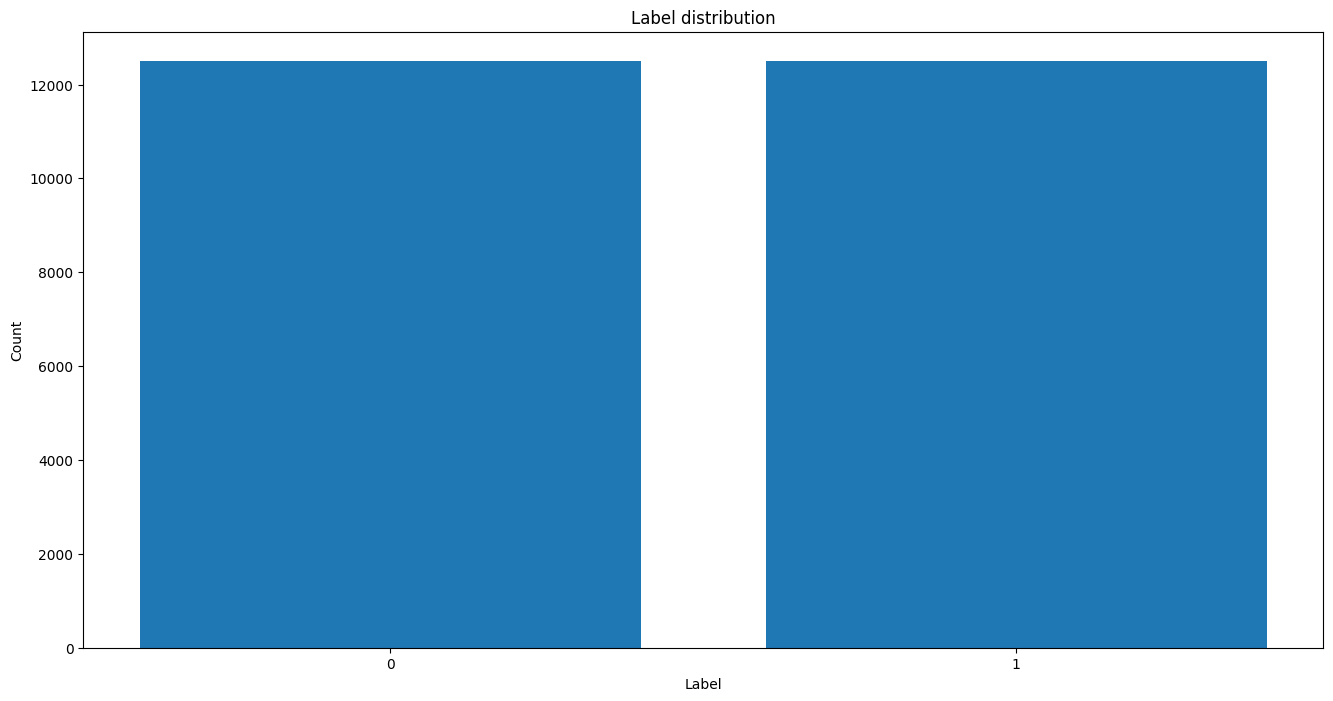

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.title('Label distribution')
plt.xlabel('Label')
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

NORMALIZAR TEXTO

In [ ]:
# Descargar stemming
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
#Descargar stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Función para limpieza de texto
def clean_text(text):
    text = text.lower() #Pasar a minúsculas
    text = ''.join([char for char in text if char.isalpha() or char == ' ' ]) # Quitamos todos los caracteres que sean numéricos o psignos de puntuación, manteniendo palabras y espacios
    text = ' '.join([word for word in text.split() if word not in stop_words and word !='br']) # Quitamos las palabras que estén dentro de la variable stop_words , además al ser palabras dejamos un espacio entre una y otra
    # text = ' '.join([stemmer.stem(word) for word in text.split()]) # Aplicamos stemming a las palabras
    return text
#  Aplicar limpieza
df['text'] = df['text'].apply(clean_text)

In [ ]:
# Crear una nueva columna con la longitud (en palabras) de las reseñas
df['palabra'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df['palabra'].describe()

,palabra
count,25000.000000
mean,120.644200
std,90.984155
min,4.000000
25%,64.000000
50%,89.000000
75%,147.000000
max,1430.000000


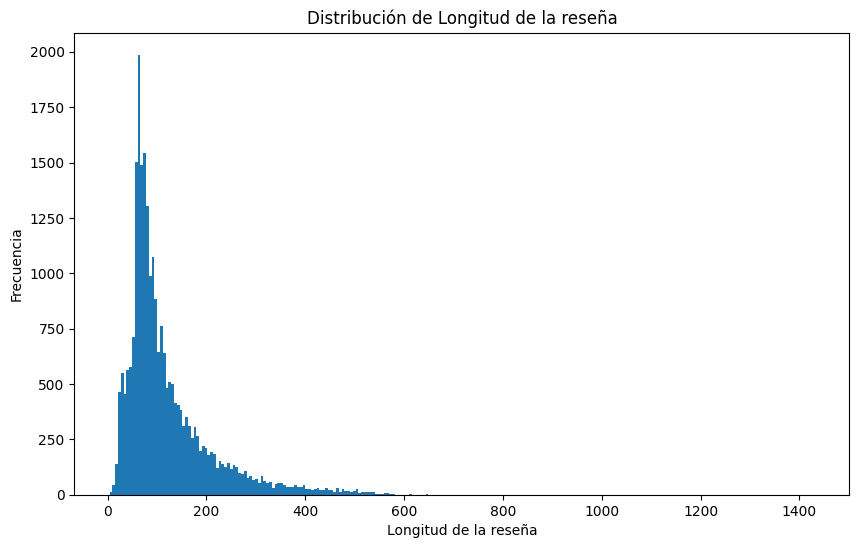

In [ ]:
import seaborn as sns
# Generar histograma para todos las reseñas
plt.figure(figsize=(10, 6))
plt.hist(df['palabra'], bins='fd')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de la reseña')
plt.show()

In [ ]:
df[df['label'] == 0]['palabra'].describe()

,palabra
count,12500.000000
mean,118.614720
std,86.730726
min,4.000000
25%,65.000000
50%,89.000000
75%,143.000000
max,806.000000


In [ ]:
df[df['label'] == 1]['palabra'].describe()

,palabra
count,12500.000000
mean,122.673680
std,95.007569
min,7.000000
25%,63.000000
50%,89.000000
75%,151.000000
max,1430.000000


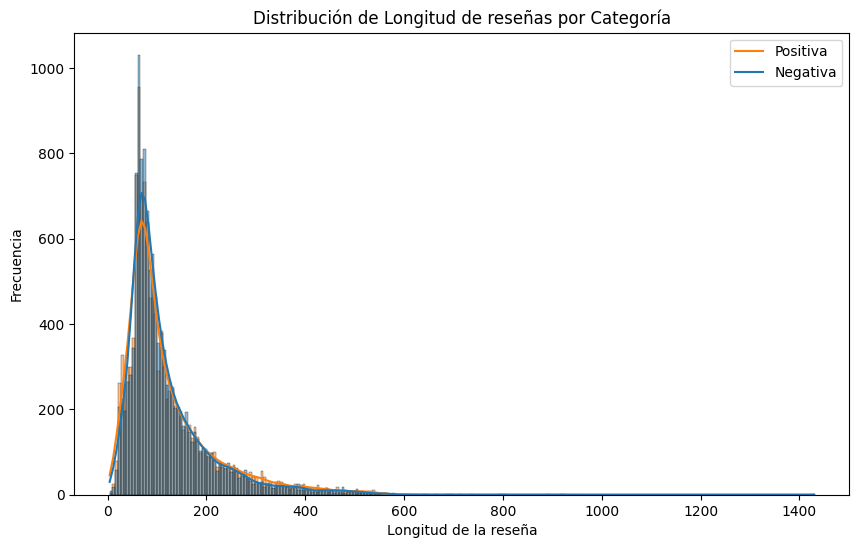

In [ ]:
# Comparación de la longitud entre reseñas positivas y negativas
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='palabra', hue='label', kde=True)

# Generar histogramas para reseñas positivas y negativas por separado
positiva_lengths = df[df['label'] == 1]['palabra']
negativa_lengths = df[df['label'] == 0]['palabra']
plt.title('Distribución de Longitud de reseñas por Categoría')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.legend(['Positiva', 'Negativa'])
plt.show()

# Eliminar la columna 'palabra' después del análisis
df.drop('palabra', axis=1, inplace=True)

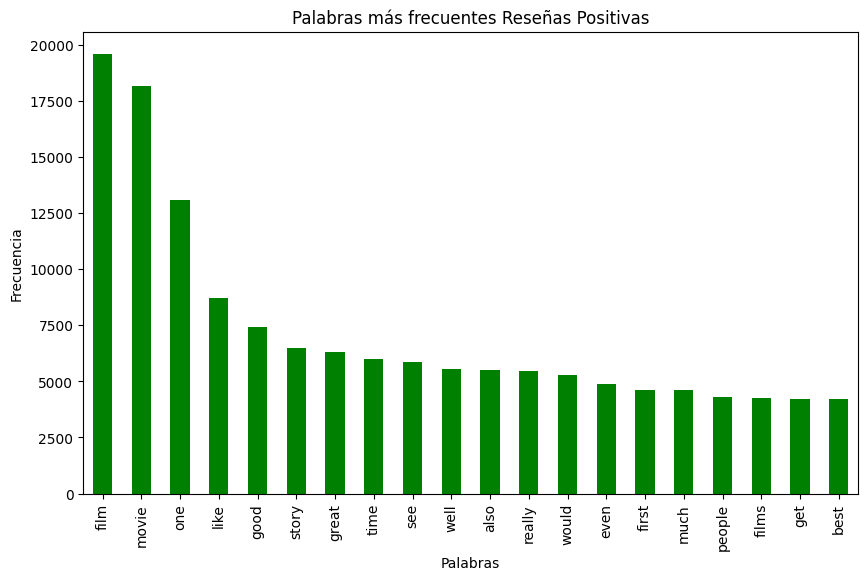

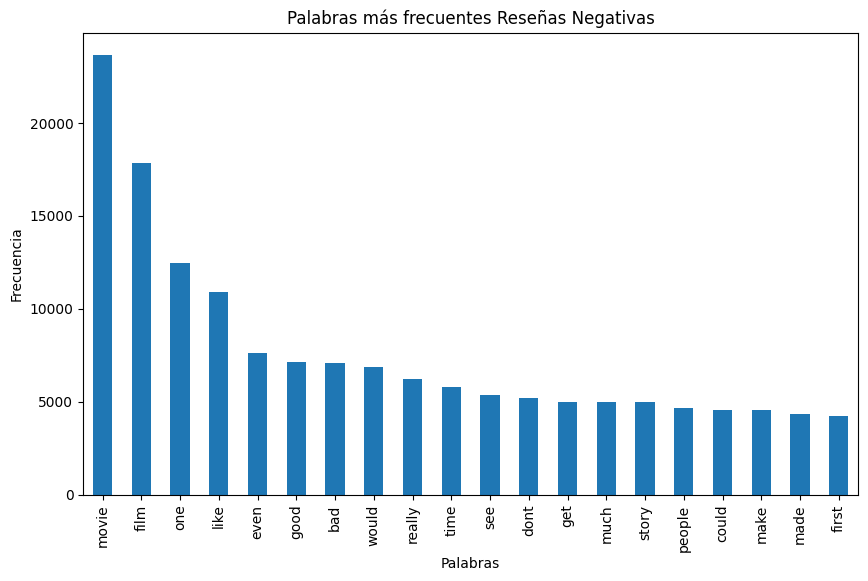

In [ ]:
# Análisis de palabras más frecuentes

# Separar mensajes de spam y no spam
reseñas_pos = ' '.join(df[df['label']==1]['text'].values)
reseñas_neg = ' '.join(df[df['label']==0]['text'].values)


# # Contar palabras en cada categoría
pos_words = pd.Series(reseñas_pos.split()).value_counts()
neg_words = pd.Series(reseñas_neg.split()).value_counts()

# Gráfico con las 20 palabras más frecuentes en spam
plt.figure(figsize=(10, 6))
pos_words.head(20).plot(kind='bar',color='green')
plt.title('Palabras más frecuentes Reseñas Positivas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico con las 20 palabras más frecuentes en no spam
plt.figure(figsize=(10, 6))
neg_words.head(20).plot(kind='bar')
plt.title('Palabras más frecuentes Reseñas Negativas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()